# Overview: OpenStreetMap data
This notebook provides examples related to the data retrieval from [OpenStreetMap](https://www.openstreetmap.org) (OSM) and its pre-processing.

## OpenStreetMap data
* Advantages:
    * World-wide coverage
    * Homogeneity of data
    * Open data
    * Geo-localized data
    * Crowd-sourced data: rapid updates
    * Contains street network infrastructure, buildings and land use information
* Disadvantages:
    * Missing data

### Data extraction:
* Data is extracted by means of using the [Overpass API](https://wiki.openstreetmap.org/wiki/Overpass_API)
* Following a well-defined [Map features wiki](https://wiki.openstreetmap.org/wiki/Map_Features), a series of geometrical elements and their associated meta-data are retrieved

### Region of interest 
- An input region of interest can be determined by any of the following:
    * Place + which result: The name of the city/region, and the result to retrieve (as seen in OpenStreetMap result order)
    * Polygon: A polygon delimitating the region of interest (latitude and longitude coordinates)
    * Bounding box: Using northing, southing, easting, and westing coordinates (latitude and longitude)
    * Point + distance (meters): Use the (latitude, longitude) central point and an input distance around it
    * Address + distance (meters): Set the address as central point and an input distance around it
    * [Additional option] Date: Retrieve the query results output for a specific time-stamp of the database
    
### Output:
* Buildings
* Building parts
* Points of Interest
* Drivable street network

In [1]:
# snippet for relative imports
import os, sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path: sys.path.append(module_path)

import matplotlib.pyplot as plt
import osmnx as ox
import urbansprawl as us

ox.config(log_file=True, log_console=True, log_name='overview_osm_data', log_filename='overview_osm_data', use_cache=True)
figsize = (12,8)

# Data extraction
* Buildings, building parts, and POIs can be retrieved for a specific region of interest in several ways
* Similarly, the drivable street network can be retrieved for a defined region of interest
* If a name is given for the city, the generated data is stored

## Region of interest determination (1): Place + result
* Manhattan (NY), United States
    * Which result determines the result number to retrieve from the performed [query](https://www.openstreetmap.org/search?query=Manhattan%2C%20New%20York)

CPU times: user 11min 10s, sys: 3 s, total: 11min 13s
Wall time: 13min 43s


(582424.070590569, 592193.1077965143, 4504998.690123868, 4526581.192058517)

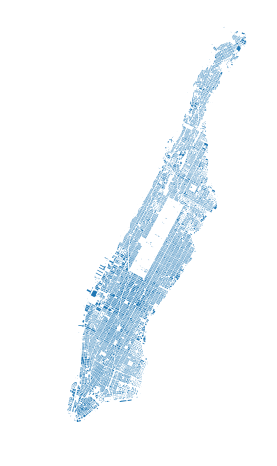

In [2]:
# Retrieve OSM data : Place + result
region_args = {"place": "Manhattan, New York", "which_result" : 1 }
%time ny_osm_buildings, ny_osm_building_parts, ny_osm_pois = us.get_processed_osm_data(city_ref = 'Manhattan_NY', region_args = region_args)
# Plot
ax = ny_osm_buildings.plot(figsize=figsize)
ax.axis('off')

## Region of interest determination (2): Polygon
* Lyon, France

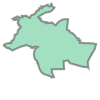

In [3]:
# Use 'osmnx' to retrieve the shape polygon corresponding to the city of 'Lyon'
city_polygon = ox.gdf_from_place("Lyon, France", which_result=1)
lyon_polygon = city_polygon.geometry[0]
lyon_polygon

CPU times: user 11min 3s, sys: 2.14 s, total: 11min 5s
Wall time: 14min 4s


(637336.0147965152, 648101.9430434718, 5063033.10810679, 5074866.380001195)

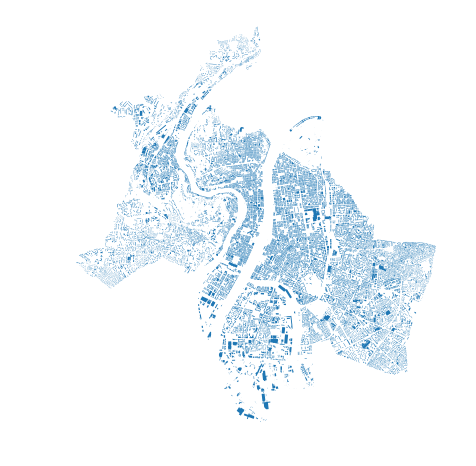

In [4]:
# Retrieve OSM data : Polygon
region_args = {"polygon": lyon_polygon }
%time df_osm_buildings, df_osm_building_parts, df_osm_pois = us.get_processed_osm_data(city_ref = 'Lyon_admnistrative_boundary', region_args = region_args)
# Plot
ax = df_osm_buildings.plot(figsize=figsize)
ax.axis('off')

## Region of interest determination (3): Bounding box
* London, England

CPU times: user 4min 19s, sys: 1.18 s, total: 4min 20s
Wall time: 4min 45s


(697239.0979970677, 703444.105698904, 5707419.592827797, 5712429.170451776)

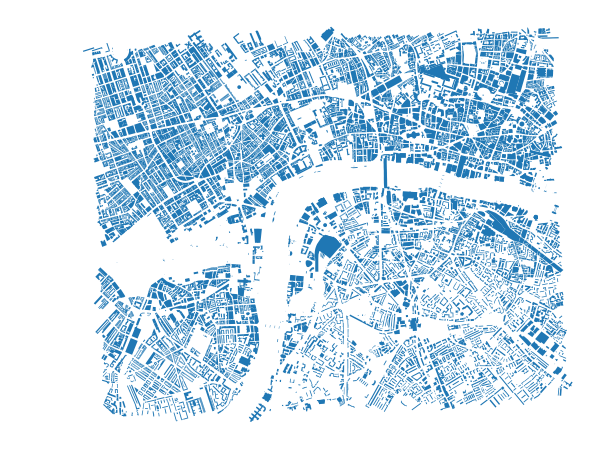

In [5]:
# Retrieve OSM data : Bounding box
region_args = {"north" : 51.524, "west" : -0.151, "south" : 51.486, "east" : -0.075}
%time df_osm_buildings, df_osm_building_parts, df_osm_pois = us.get_processed_osm_data(city_ref = 'London_central', region_args = region_args)
# Plot
ax = df_osm_buildings.plot(figsize=figsize)
ax.axis('off')

## Region of interest determination (4): Point + distance
* Paris, France

In [6]:
# Eiffel tower point
eiffel_latitude, eiffel_longitude = 48.858093, 2.294694
# Distance in meters around the point : 5km
distance_meters = 5000

CPU times: user 52min 15s, sys: 9.46 s, total: 52min 25s
Wall time: 52min 56s


(442586.89896832214, 453944.6010436567, 5406309.852345003, 5417617.829957534)

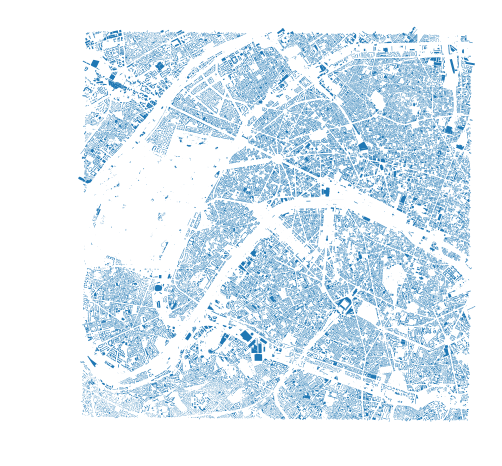

In [7]:
# Retrieve OSM data : Point + distance around
region_args = {'point' : (eiffel_latitude, eiffel_longitude), 'distance' : distance_meters}
%time df_osm_buildings, df_osm_building_parts, df_osm_pois = us.get_processed_osm_data(city_ref = 'Paris_Eiffel_centered', region_args = region_args)
# Plot
ax = df_osm_buildings.plot(figsize=figsize)
ax.axis('off')

## Region of interest determination (5): Address + distance
* Roman coliseum, Italy

In [8]:
roman_coliseum_address = "1, Piazza del Colosseo, Roma, Italy"
# Distance in meters around the point : 5km
distance_meters = 5000

CPU times: user 11min 10s, sys: 1.68 s, total: 11min 12s
Wall time: 11min 33s


(286377.8583754783, 297804.59078174294, 4634930.130554386, 4646269.852953957)

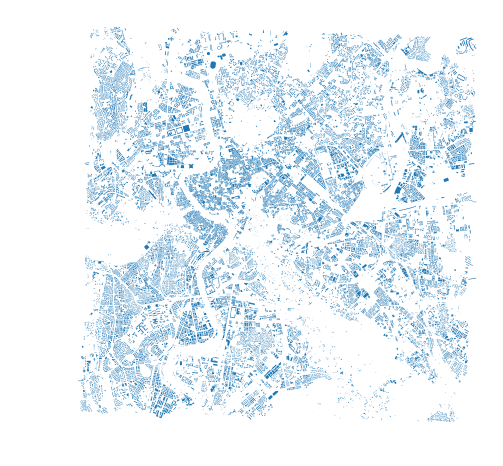

In [9]:
# Retrieve OSM data : Address + distance around
region_args = {'address' : roman_coliseum_address, 'distance' : distance_meters}
%time df_osm_buildings, df_osm_building_parts, df_osm_pois = us.get_processed_osm_data(city_ref = 'Rome_coliseum_centered', region_args = region_args)
# Plot
ax = df_osm_buildings.plot(figsize=figsize)
ax.axis('off')

## Street network
* By default, ***get_processed_osm_data*** will retrieve the street network for the defined region of interest
* As well, the stand-alone drivable street network can be retrieved through an input polygon shape, or a bounding box of coordinates
* The output is represented using a [NetworkX](https://networkx.github.io/) graph object

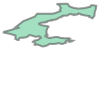

In [10]:
# Use 'osmnx' to retrieve the shape polygon corresponding to the city of 'Ushuaia, Argentina'
city_polygon = ox.gdf_from_place("Ushuaia, Argentina")
ushuaia_polygon = city_polygon.geometry[0]
ushuaia_polygon

CPU times: user 9.11 s, sys: 8.02 ms, total: 9.12 s
Wall time: 10.3 s


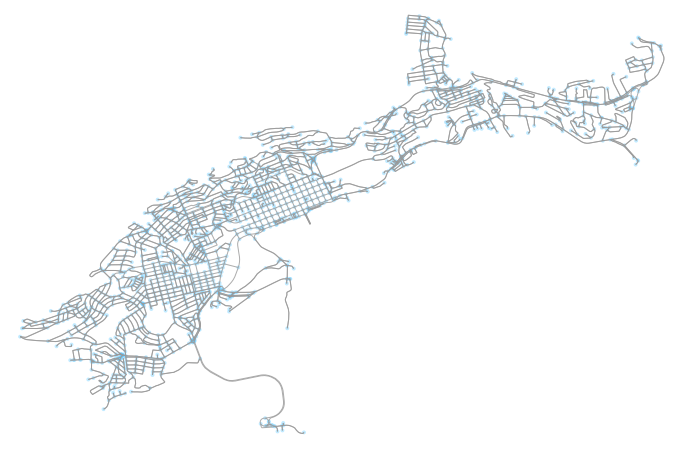

In [11]:
# Retrieve the street network : Polygon
%time ushuaia_street_network = us.get_route_graph('Ushuaia', polygon=ushuaia_polygon)
# Plot the street network
f, ax = ox.plot_graph(ushuaia_street_network, fig_height=figsize[1], fig_width=figsize[0], edge_alpha=0.8, node_alpha=0.4)

## Data storage
* If any of the methods **get_processed_osm_data** and **get_route_graph** receive as parameter a name for the input region of interest (i.e. **city_ref** parameter), the generated data will be stored in the ***`./data/`*** folder
    * Each of these methods will first try to retrieve already stored data
    * If no stored data exists for input city, 1) it is retrieved using the defined region of interest, and 2) it is stored under the **city_ref** name
* Data is stored using the [GeoJSON](https://en.wikipedia.org/wiki/GeoJSON) format

In [12]:
# Retrieve stored data for the city: `Rome`
%time rome_street_network = us.get_route_graph('Rome_coliseum_centered')
%time rome_buildings, rome_building_parts, rome_pois = us.get_processed_osm_data('Rome_coliseum_centered')

CPU times: user 4.13 s, sys: 7.99 ms, total: 4.14 s
Wall time: 4.14 s
CPU times: user 5min 32s, sys: 28 ms, total: 5min 32s
Wall time: 5min 32s


(286679.5803417064, 297615.666994593, 4635120.867816678, 4646061.369923007)

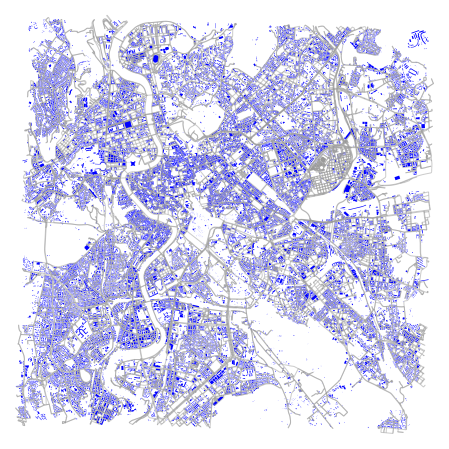

In [13]:
# Plot the street network
f, ax = ox.plot_graph(rome_street_network, fig_height=figsize[1], fig_width=figsize[0], edge_alpha=0.5, node_alpha=0, show=False, close=False)
# On top, plot the buildings
rome_buildings.plot(figsize=figsize, color="blue", ax=ax)
ax.axis('off')

* If 1) there exists no data stored for an input city, and 2) no region of interest is set
    * The methods return empty output/s

In [14]:
null_street_network = us.get_route_graph('Null-city')
null_street_network is None

True

In [15]:
null_buildings, null_building_parts, null_pois = us.get_processed_osm_data('Null-city')
(null_buildings is None) and (null_building_parts is None) and (null_pois is None)

True

# Processed data output
## Output
* df_osm_buildings: Buildings
* df_osm_buiding_parts: Building parts
* df_osm_pois: Points of Interest (POIs)

### Coordinate reference system
* crs: Attribute that denotes the coordinate reference system of the geometries
    * The geometries are projected to [UTM](https://en.wikipedia.org/wiki/Universal_Transverse_Mercator_coordinate_system) coordinates using the most appropriate zone

### Characteristics
* geometry: Geometries shape associated to each element
* osm_id: OpenStreetMap [identification](https://wiki.openstreetmap.org/wiki/Permanent_ID)
* height_tags: OSM tags corresponding to a building's height (for more information, see the [Building levels wiki](https://wiki.openstreetmap.org/wiki/Key:building:levels) )
* classification: [Land use](https://wiki.openstreetmap.org/wiki/Landuse) classification: 'activity', 'residential', or 'mixed'
* key_value: OpenStreetMap [key-value](https://wiki.openstreetmap.org/wiki/Key:landuse) tags which define their land use (see [Map features wiki](https://wiki.openstreetmap.org/wiki/Map_Features))
* activity_category: activity land uses are further classified according to their specific type of activity: 'commercial/industrial', 'leisure/amenity', or 'shop'
* containing_parts: Indices corresponding to the containing building parts (for buildings)
* containing_poi: Indices corresponding to the containing Points of Interest (for buildings)
* building_levels: Effective number of building levels
* landuses_m2: Building's area associated to each land use

In [16]:
rome_buildings.crs, rome_building_parts.crs, rome_pois.crs

({'datum': 'WGS84', 'ellps': 'WGS84', 'proj': 'utm', 'zone': 33, 'units': 'm'},
 {'datum': 'WGS84', 'ellps': 'WGS84', 'proj': 'utm', 'zone': 33, 'units': 'm'},
 {'datum': 'WGS84', 'ellps': 'WGS84', 'proj': 'utm', 'zone': 33, 'units': 'm'})

In [17]:
rome_buildings.head()

,osm_id,height_tags,classification,key_value,containing_parts,building_levels,landuses_m2,containing_poi,activity_category,geometry
0,8035487,{},residential,{'inferred': None},"[939, 932, 770, 867, 925, 937, 923, 810, 827, ...",1.0,"{'activity': 0, 'residential': 40467.434236237...",NaN,NaN,"POLYGON ((289812.7428543457 4642070.274291229,..."
1,23276946,{},activity,{'building': 'train_station'},NaN,1.0,"{'activity': 7591.2583200280005, 'residential'...","[2862, 1810, 2075, 1808, 4984, 4986, 5303, 285...",[leisure/amenity],"POLYGON ((292707.1116754316 4641722.330591016,..."
2,23442671,{},mixed,{'inferred': None},NaN,1.0,"{'activity': 838.860802557809, 'residential': ...",[4504],NaN,"POLYGON ((291188.0089566214 4642685.752456947,..."
3,23442735,{},activity,{'building': 'church'},NaN,1.0,"{'activity': 2395.4453988006794, 'residential'...",NaN,[leisure/amenity],"POLYGON ((291096.7998665739 4636542.119268949,..."
4,23481951,{},activity,"{'amenity': 'university', 'building': 'yes'}",NaN,1.0,"{'activity': 9809.692150535528, 'residential':...",NaN,[leisure/amenity],"POLYGON ((290372.965615418 4636329.156421575, ..."


In [18]:
rome_building_parts.head()

,osm_id,height_tags,key_value,building_levels,activity_category,classification,geometry
0,23840631,{'height': 28.3},{},9.0,NaN,NaN,"POLYGON ((290700.2744215037 4641620.52858996, ..."
1,60575536,{},{},1.0,NaN,NaN,"POLYGON ((290333.4205881418 4641633.901073822,..."
2,60578699,{},{},1.0,NaN,NaN,"POLYGON ((290473.8107066714 4641312.428754417,..."
3,60616325,{},{},1.0,NaN,NaN,"POLYGON ((290931.9711659499 4641302.303764947,..."
4,112191223,{'building:levels': 2.0},{},2.0,NaN,NaN,"POLYGON ((294470.9208910383 4638782.607459267,..."


In [19]:
rome_pois.head()

,osm_id,classification,key_value,activity_category,geometry
0,32631124,activity,{'amenity': 'cafe'},[leisure/amenity],POINT (290740.9254799158 4641868.563419513)
1,100993389,activity,{'amenity': 'fuel'},[leisure/amenity],POINT (291464.353028701 4639747.549657312)
2,226903493,activity,{'amenity': 'fuel'},[leisure/amenity],POINT (295260.9134244289 4637304.890579496)
3,226912127,activity,{'amenity': 'fuel'},[leisure/amenity],POINT (287750.5442506456 4637470.195578462)
4,226914361,activity,{'amenity': 'fuel'},[leisure/amenity],POINT (287597.6745511462 4639569.816018843)


### Buildings containing building parts and points of interest

In [20]:
# Associate building parts to its containing buildings
rome_buildings["full_containing_building_parts"] = rome_buildings.containing_parts.apply(lambda x: rome_building_parts.loc[x ] if isinstance(x, list) else rome_building_parts.loc[ [] ] )
# Examples
rome_buildings[ rome_buildings["full_containing_building_parts"].notnull() ].head()

,osm_id,height_tags,classification,key_value,containing_parts,building_levels,landuses_m2,containing_poi,activity_category,geometry,full_containing_building_parts
0,8035487,{},residential,{'inferred': None},"[939, 932, 770, 867, 925, 937, 923, 810, 827, ...",1.0,"{'activity': 0, 'residential': 40467.434236237...",NaN,NaN,"POLYGON ((289812.7428543457 4642070.274291229,...",osm_id heigh...
1,23276946,{},activity,{'building': 'train_station'},NaN,1.0,"{'activity': 7591.2583200280005, 'residential'...","[2862, 1810, 2075, 1808, 4984, 4986, 5303, 285...",[leisure/amenity],"POLYGON ((292707.1116754316 4641722.330591016,...","Empty GeoDataFrame Columns: [osm_id, height_ta..."
2,23442671,{},mixed,{'inferred': None},NaN,1.0,"{'activity': 838.860802557809, 'residential': ...",[4504],NaN,"POLYGON ((291188.0089566214 4642685.752456947,...","Empty GeoDataFrame Columns: [osm_id, height_ta..."
3,23442735,{},activity,{'building': 'church'},NaN,1.0,"{'activity': 2395.4453988006794, 'residential'...",NaN,[leisure/amenity],"POLYGON ((291096.7998665739 4636542.119268949,...","Empty GeoDataFrame Columns: [osm_id, height_ta..."
4,23481951,{},activity,"{'amenity': 'university', 'building': 'yes'}",NaN,1.0,"{'activity': 9809.692150535528, 'residential':...",NaN,[leisure/amenity],"POLYGON ((290372.965615418 4636329.156421575, ...","Empty GeoDataFrame Columns: [osm_id, height_ta..."


In [21]:
# Associate POIs to its containing buildings
rome_buildings["full_containing_pois"] = rome_buildings.containing_poi.apply(lambda x: rome_pois.loc[x ] if isinstance(x, list) else rome_pois.loc[ [] ] )
# Examples
rome_buildings[ rome_buildings["full_containing_pois"].notnull() ].head()

,osm_id,height_tags,classification,key_value,containing_parts,building_levels,landuses_m2,containing_poi,activity_category,geometry,full_containing_building_parts,full_containing_pois
0,8035487,{},residential,{'inferred': None},"[939, 932, 770, 867, 925, 937, 923, 810, 827, ...",1.0,"{'activity': 0, 'residential': 40467.434236237...",NaN,NaN,"POLYGON ((289812.7428543457 4642070.274291229,...",osm_id heigh...,"Empty GeoDataFrame Columns: [osm_id, classific..."
1,23276946,{},activity,{'building': 'train_station'},NaN,1.0,"{'activity': 7591.2583200280005, 'residential'...","[2862, 1810, 2075, 1808, 4984, 4986, 5303, 285...",[leisure/amenity],"POLYGON ((292707.1116754316 4641722.330591016,...","Empty GeoDataFrame Columns: [osm_id, height_ta...",osm_id classification ...
2,23442671,{},mixed,{'inferred': None},NaN,1.0,"{'activity': 838.860802557809, 'residential': ...",[4504],NaN,"POLYGON ((291188.0089566214 4642685.752456947,...","Empty GeoDataFrame Columns: [osm_id, height_ta...",osm_id classification ...
3,23442735,{},activity,{'building': 'church'},NaN,1.0,"{'activity': 2395.4453988006794, 'residential'...",NaN,[leisure/amenity],"POLYGON ((291096.7998665739 4636542.119268949,...","Empty GeoDataFrame Columns: [osm_id, height_ta...","Empty GeoDataFrame Columns: [osm_id, classific..."
4,23481951,{},activity,"{'amenity': 'university', 'building': 'yes'}",NaN,1.0,"{'activity': 9809.692150535528, 'residential':...",NaN,[leisure/amenity],"POLYGON ((290372.965615418 4636329.156421575, ...","Empty GeoDataFrame Columns: [osm_id, height_ta...","Empty GeoDataFrame Columns: [osm_id, classific..."


# Processed OSM data visualization
* Buildings with their associated land use classification
* Points of interest with their associated land use classification
* Buildings containing other building parts

### Buildings
* Locations of residential and activity uses are retrieved
    * Red: Activity uses
    * Blue: Residential uses
    * Green: Mixed-uses

(286679.5803417064, 297615.666994593, 4635120.867816678, 4646061.369923007)

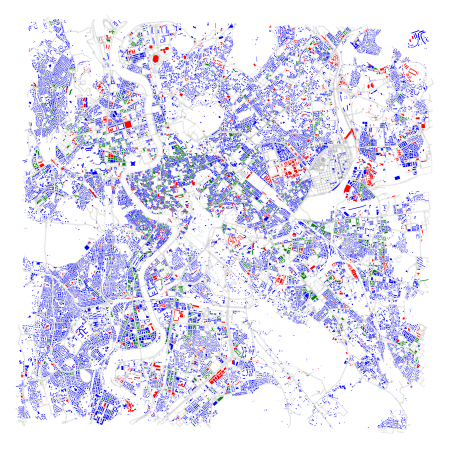

In [22]:
# Get buildings per classification
df_residential = rome_buildings[ rome_buildings.classification.isin(["residential"]) ]
df_activities = rome_buildings[ rome_buildings.classification.isin(["activity"]) ]
df_mixed = rome_buildings[ rome_buildings.classification.isin(["mixed"]) ]

# Plot
f, ax = ox.plot_graph(rome_street_network, fig_height=figsize[1], fig_width=figsize[0], edge_alpha=0.15, node_alpha=0, show=False, close=False)
# Buildings
if (not df_residential.empty):
    df_residential.plot(figsize=figsize, color="blue", ax=ax)
if (not df_activities.empty):
    df_activities.plot(figsize=figsize, color="red", ax=ax)
if (not df_mixed.empty):
    df_mixed.plot(figsize=figsize, color="green", ax=ax)
ax.axis('off')

### Points of interest (POIs)
* A [POI](https://wiki.openstreetmap.org/wiki/Points_of_interest) represents a feature on a map that occupies a particular point, as opposed to linear features like roads or areas of landuse
* POIs are most often associated to activity land uses

(286679.5803417064, 297615.666994593, 4635120.867816678, 4646061.369923007)

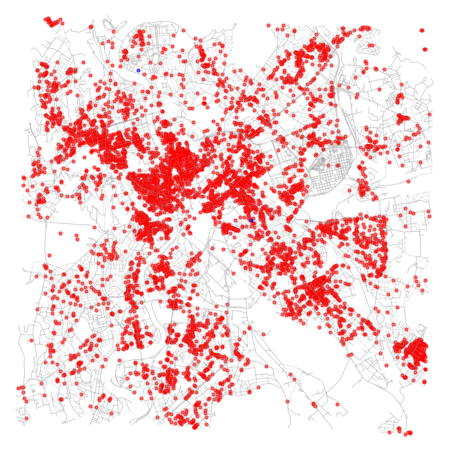

In [23]:
# Get POIs per classification
df_pois_activities = rome_pois[ rome_pois.classification.isin(["activity"]) ]
df_pois_residential = rome_pois[ rome_pois.classification.isin(["residential"]) ]
df_pois_mixed = rome_pois[ rome_pois.classification.isin(["mixed"]) ]

# Plot
f, ax = ox.plot_graph(rome_street_network, fig_height=figsize[1], fig_width=figsize[0], edge_alpha=0.2, node_alpha=0, show=False, close=False)
# Points of Interest
if (not df_pois_activities.empty):
    df_pois_activities.plot(figsize=figsize, color="red", ax=ax, alpha=0.6, markersize=10)
if (not df_pois_residential.empty):
    df_pois_residential.plot(figsize=figsize, color="blue", ax=ax, alpha=0.6, markersize=10)
if (not df_pois_mixed.empty):
    df_pois_mixed.plot(figsize=figsize, color="green", ax=ax, alpha=0.6, markersize=10)
ax.axis('off')

### Building parts information
* [Building parts](https://wiki.openstreetmap.org/wiki/Key:building:part) denote a part of a building where some building attributes or the building function are different from the rest of the building
* Manhattan is a prominent example of building parts availability
    * Blue: Buildings which contain other building parts
    * Red: Buildings with no additional building parts

(582751.3980910545, 591934.3461148135, 4505606.314452423, 4525988.319281)

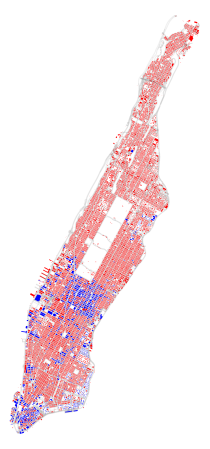

In [24]:
ny_buildings_containing_parts = ny_osm_buildings[ ny_osm_buildings.containing_parts.notnull() ]
ny_buildings_no_parts = ny_osm_buildings[ ny_osm_buildings.containing_parts.isnull() ]
ny_street_network = us.get_route_graph('Manhattan_NY')

# Plot
f, ax = ox.plot_graph(ny_street_network, fig_height=figsize[1], fig_width=figsize[0], edge_alpha=0.15, node_alpha=0, show=False, close=False)
# Buildings
if (not ny_buildings_containing_parts.empty):
    ny_buildings_containing_parts.plot(figsize=figsize, color="blue", ax=ax)
if (not ny_buildings_no_parts.empty):
    ny_buildings_no_parts.plot(figsize=figsize, color="red", ax=ax)
ax.axis('off')

### Buildings height
* Building's can contain [height](https://wiki.openstreetmap.org/wiki/Key:height) and/or number of [levels](https://wiki.openstreetmap.org/wiki/Key:building:levels), among other information
* Manhattan is a prominent example of building height/levels availability
    * Blue: Buildings with height/levels information
    * Red: Buildings without any height related information

(582751.3980910545, 591934.3461148135, 4505606.314452423, 4525988.319281)

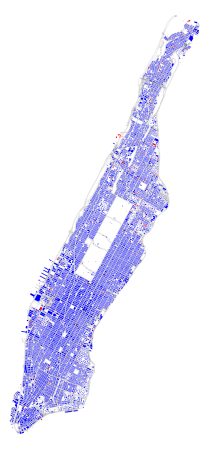

In [25]:
ny_buildings_with_height = ny_osm_buildings[ ny_osm_buildings.apply(lambda x: abs(x.geometry.area - (x.landuses_m2["activity"] + x.landuses_m2["residential"]) ) > 0.1, axis=1) ]
ny_buildings_without_height = ny_osm_buildings[ ny_osm_buildings.apply(lambda x: abs(x.geometry.area - (x.landuses_m2["activity"] + x.landuses_m2["residential"]) ) <= 0.1, axis=1) ]

# Plot
f, ax = ox.plot_graph(ny_street_network, fig_height=figsize[1], fig_width=figsize[0], edge_alpha=0.15, node_alpha=0, show=False, close=False)
# Buildings
if (not ny_buildings_with_height.empty):
    ny_buildings_with_height.plot(figsize=figsize, color="blue", ax=ax)
if (not ny_buildings_without_height.empty):
    ny_buildings_without_height.plot(figsize=figsize, color="red", ax=ax)
ax.axis('off')

# Timestamp OSM data
* Each contribution made in the OSM database has a time-stamp associated to it
* It is possible to retrieve the state of the database for a specific timestamp

Retrieve state of the city for the following date:  2018-04-03 10:28:42.832984
CPU times: user 3min 22s, sys: 448 ms, total: 3min 22s
Wall time: 5min 19s


(710079.6946129934, 716588.5696317523, 5003392.674991356, 5010472.518175606)

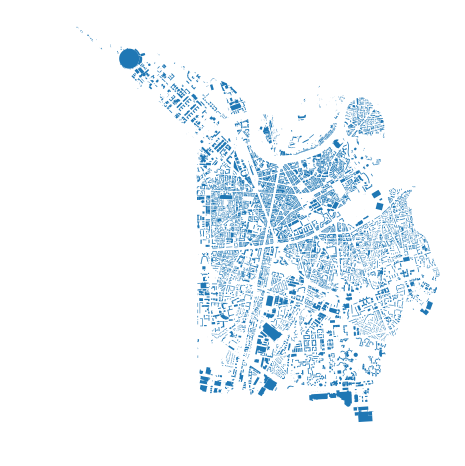

In [26]:
from datetime import datetime, timedelta
# Retrieve the UTC date : 6 months ago
date = datetime.utcnow() - timedelta( days = 365./2. )
print( "Retrieve state of the city for the following date: ", date )

# Grenoble, France + State of the database 6 months ago
kwargs={'retrieve_graph': True, 'default_height': 3, 'meters_per_level': 3, 'associate_landuses_m2': True, 'mixed_building_first_floor_activity': True, 'minimum_m2_building_area': 9, 'date': date}
region_args = {"place" : "Grenoble, France"}
%time buildings_6months, building_parts_6months, pois_6months = us.get_processed_osm_data(city_ref = 'Grenoble_6months', region_args = region_args, kwargs = kwargs)

# Plot
ax = buildings_6months.plot(figsize=figsize)
ax.axis('off')

# Processing OSM data
* The procedure is guided by keyword arguments
* They can be modified according to each users' need

In [27]:
kwargs = {}

# Defines whether the street network will be retrieved and stored for input region of interest
kwargs['retrieve_graph'] = True

# If no height information is available, define the building's default height (in meters)
kwargs['default_height'] = 3

# In order to find an equivalence between building's height (in meters) and its number of levels, the number of meters per level is defined
kwargs['meters_per_level'] = 3

# Indicate if the method should associate, for each building, its surface dedicated to each land use
kwargs['associate_landuses_m2'] = True

# Filters out buildings computing a small surface (squared-meter): generally associated to garages, and other structures.
kwargs['minimum_m2_building_area'] = 9

# The surface of a building with mixed land use contributes to both a residential and an activity use. This can be determined as:
#  1) the building's first floor surface contributes to an activity land use, and the rest to a residential use
#  2) the total amount of surface is evenly distributed for each land use
kwargs['mixed_building_first_floor_activity'] = True

# Retrieves the results using the state of the database for a specific time-stamp. If `None`, it retrieves the current database state
kwargs['date'] = None

# Grenoble, France
region_args = {'place' : "Grenoble, France"}
# Retrieve and process OSM data with specified parameters
%time grenoble_buildings, grenoble_building_parts, grenoble_pois = us.get_processed_osm_data(city_ref=None, region_args=region_args, kwargs=kwargs)

CPU times: user 3min 2s, sys: 376 ms, total: 3min 2s
Wall time: 4min 29s
